 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [ ]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns 
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [13]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace = True)

In [14]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [15]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [16]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)

In [17]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [18]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [19]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)

In [20]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [21]:
# Fix Data Types
sp500_history['Close']= sp500_history['Close'].str.replace('$', '').astype('float')


<ipython-input-21-4b4b121198fc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history['Close']= sp500_history['Close'].str.replace('$', '').astype('float')


In [24]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()

In [26]:
# Drop nulls
sp500_returns.dropna(inplace = True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [28]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns = {"Close" : "S&P 500"}, inplace = True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [29]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis = "columns", join = "inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

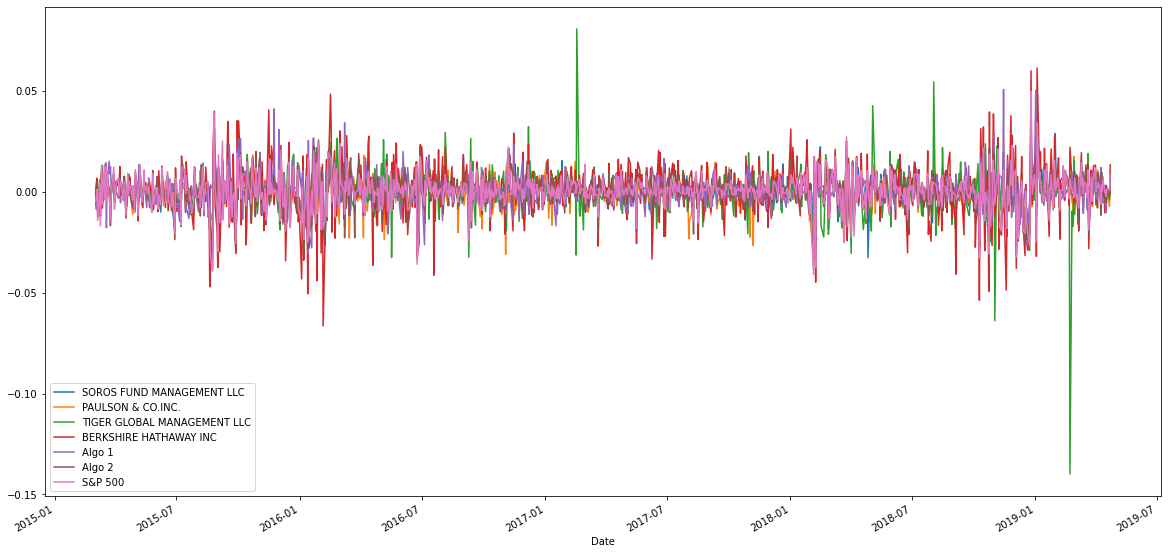

In [30]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

Berkshire Hathaway Inc and Algo 1 outperformed the S&P 500.



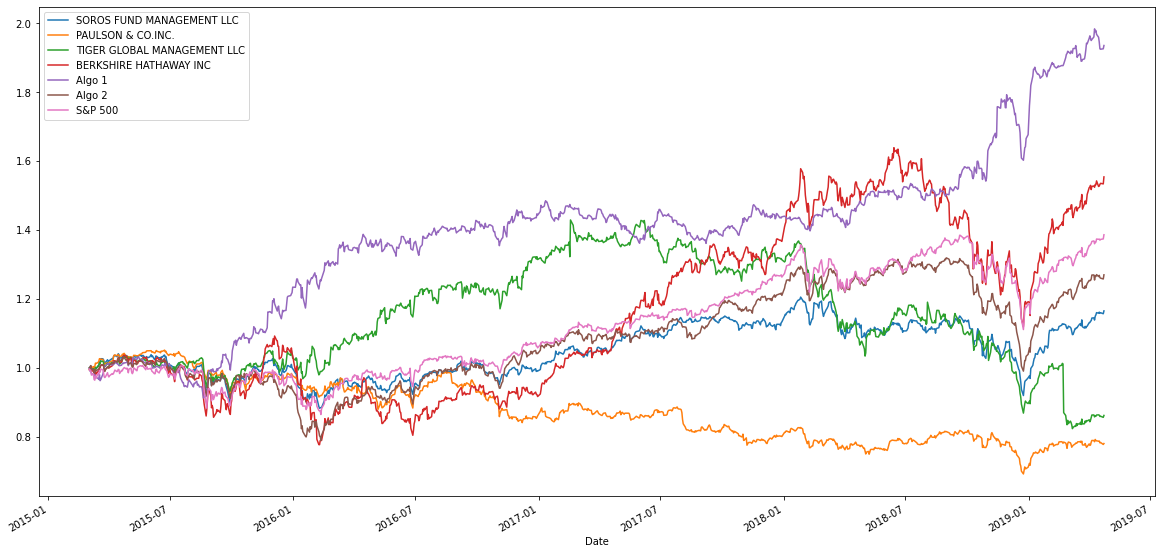

In [44]:
# Calculate cumulative returns of all portfolios
combined_cum_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
combined_cum_returns.plot(figsize = (20,10))

print('Berkshire Hathaway Inc and Algo 1 outperformed the S&P 500.\n')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

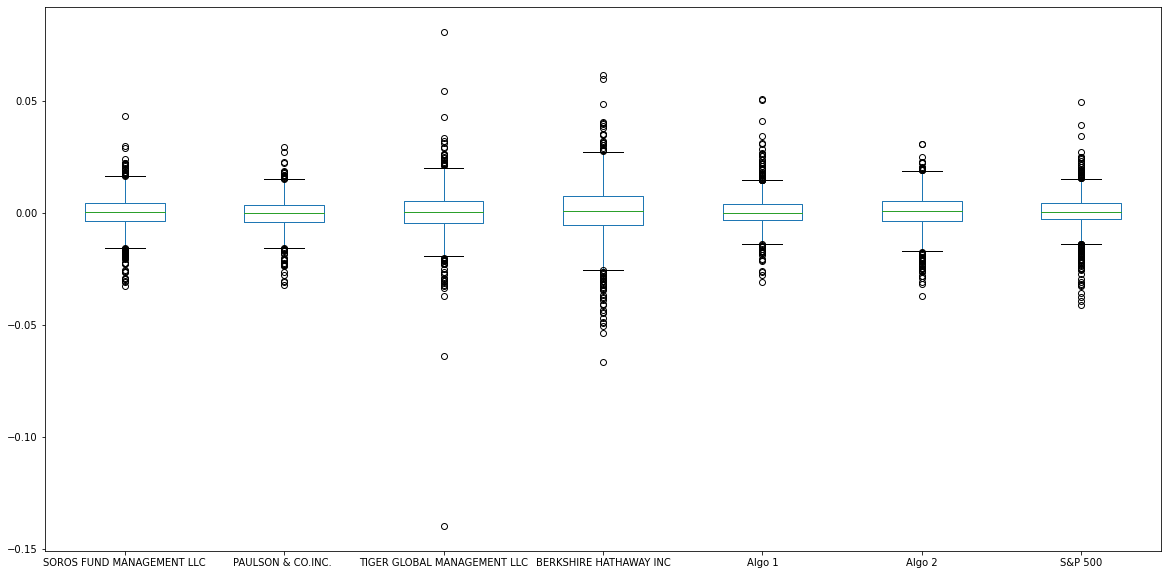

In [32]:
# Box plot to visually show risk
combined_returns.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [33]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = pd.DataFrame(combined_returns.std()).rename(columns = {0: 'STD'})
combined_returns_std

,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [88]:
# Determine which portfolios are riskier than the S&P 500
riskier_std = combined_returns_std[combined_returns_std["STD"] > combined_returns_std.loc["S&P 500", "STD"]]
riskier_std


,STD
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


#### Which portfolios are riskier?

The Global Management LLC and Berkshire Hathaway Inc are riskier than the S&P 500.

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized standard deviation (252 trading days)
annualized_returns_std = combined_returns_std * np.sqrt(252)
annualized_returns_std

,STD
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P 500,0.135786


---

# Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

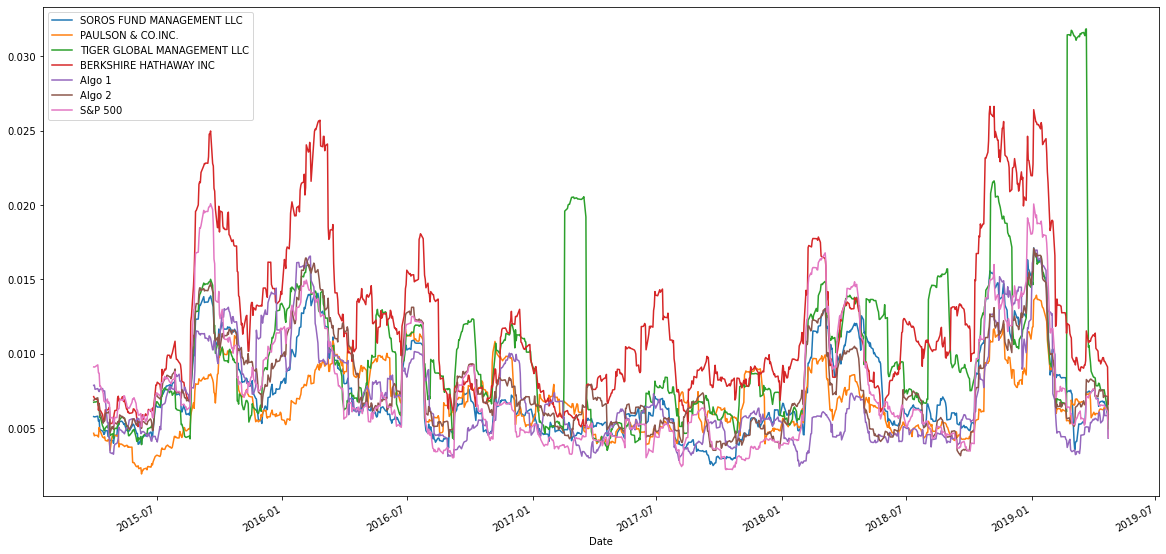

In [46]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

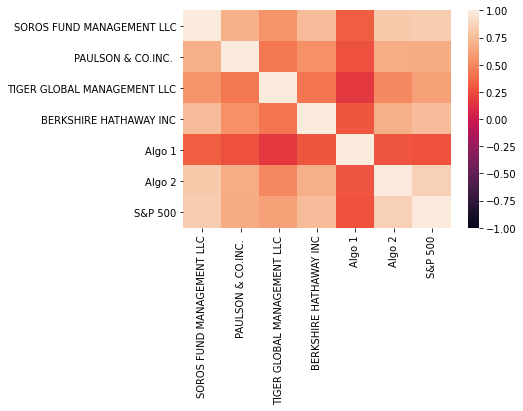

In [47]:
# Calculate the correlation
combined_corr = combined_returns.corr()

# Display the correlation matrix
sns.heatmap(combined_corr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Algo 1'}, xlabel='Date'>

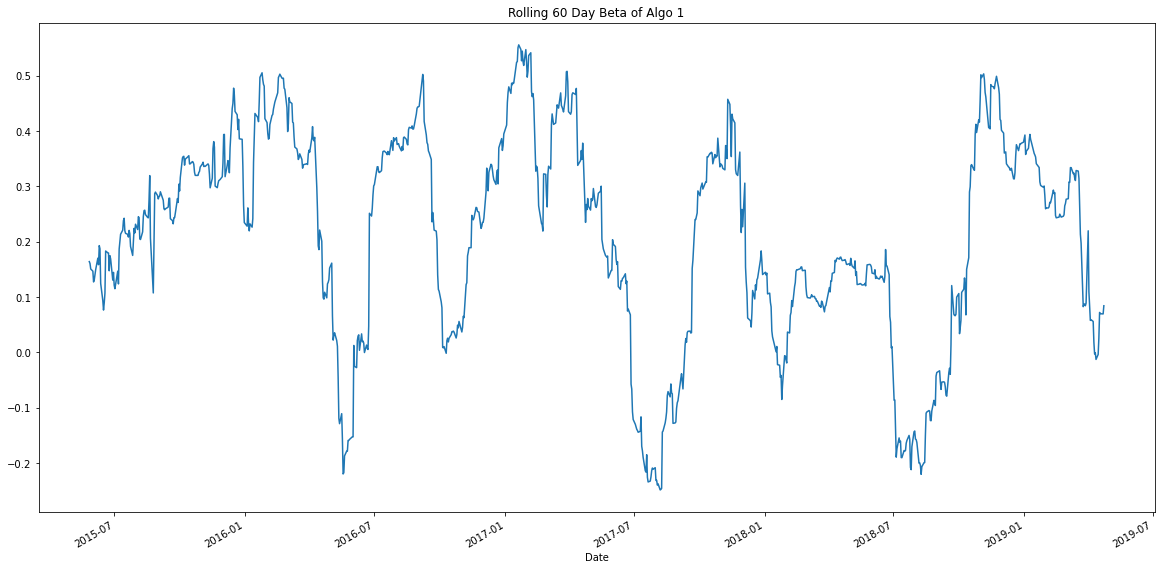

In [48]:
# Calculate covariance of a single portfolio
algo1_cov = combined_returns['Algo 1'].rolling(window=60).cov(combined_returns['S&P 500'])

# Calculate variance of S&P 500
sp500_var = combined_returns['S&P 500'].rolling(window=60).var()

# Computing beta
beta = algo1_cov / sp500_var

# Plot beta trend
beta.plot(figsize=(20, 10), title = "Rolling 60 Day Beta of Algo 1")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

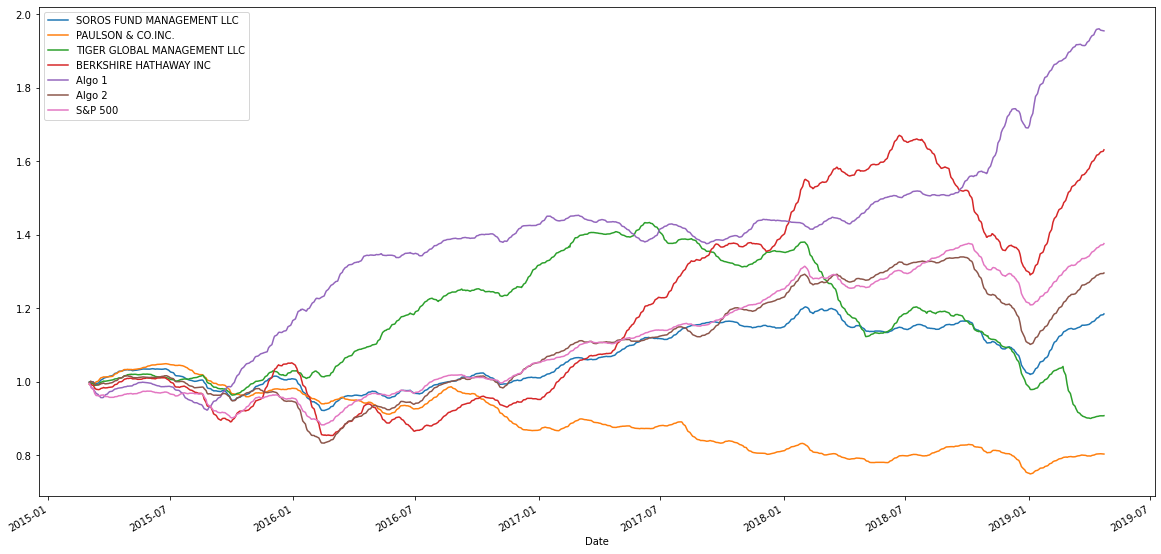

In [50]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm = combined_returns.ewm(span = 21).mean()
(1 + combined_returns_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean()*252)/(combined_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

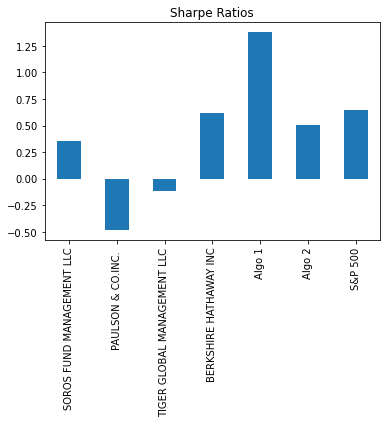

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed the other portfolios while Algo 2 underperformed compared to the S&P 500 and Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [56]:
# Reading data from 1st stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_returns = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_returns.rename(columns={"NOCP":"AAPL"},inplace = True )
aapl_returns.drop(columns=["Symbol"], axis=1, inplace= True)
aapl_returns.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [60]:
# Reading data from 2nd stock
goog_csv = Path("Resources/goog_historical.csv")
goog_returns = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_returns.rename(columns={"NOCP":"GOOG"},inplace = True )
goog_returns.drop(columns=["Symbol"], axis=1, inplace = True)
goog_returns.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [61]:
# Reading data from 3rd stock
cost_csv = Path("Resources/cost_historical.csv")
cost_returns = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_returns.rename(columns={"NOCP":"COST"},inplace = True )
cost_returns.drop(columns=["Symbol"], axis=1,inplace = True)
cost_returns.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [62]:
# Combine all stocks in a single DataFrame
combined_portfolio = pd.concat([aapl_returns, goog_returns, cost_returns], axis = 'columns',join = 'inner')
combined_portfolio.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62


In [63]:
# Reset Date index
combined_portfolio.index = combined_portfolio.index.normalize()

In [64]:
# Reorganize portfolio data by having a column per symbol
combined_portfolio.sort_index(inplace = True)

In [74]:
# Calculate daily returns
daily_returns = combined_portfolio.pct_change()

# Drop NAs
daily_returns.dropna(inplace = True)

# Display sample data
daily_returns.head()


,AAPL,GOOG,COST
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [72]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = daily_returns.dot(weights)

# Display sample data
portfolio_return.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [75]:
# Join your returns DataFrame to the original returns DataFrame
summary_df = pd.concat([portfolio_return, combined_returns], axis = 'columns', join = 'inner')
summary_df.rename(columns= {0: 'Portfolio'}, inplace = True)
summary_df.sort_index()
summary_df


,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [78]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
summary_df.dropna(inplace = True)
summary_df

,Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [79]:
# Calculate the annualized `std`
annualized_var = summary_df.var()*252
annualized_std = np.sqrt(annualized_var)
annualized_std

Portfolio                      0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

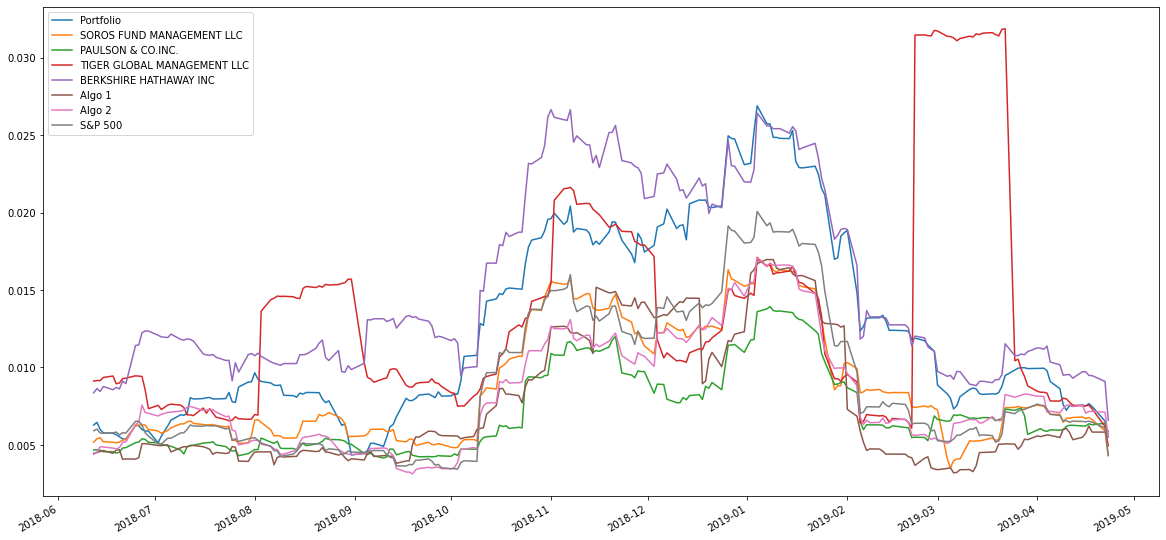

In [80]:
# Calculate rolling standard deviation
rolling_21d_std = summary_df.rolling(window = 21).std()

# Plot rolling standard deviation
rolling_21d_std.plot(figsize = (20, 10))


### Calculate and plot the correlation

<AxesSubplot:>

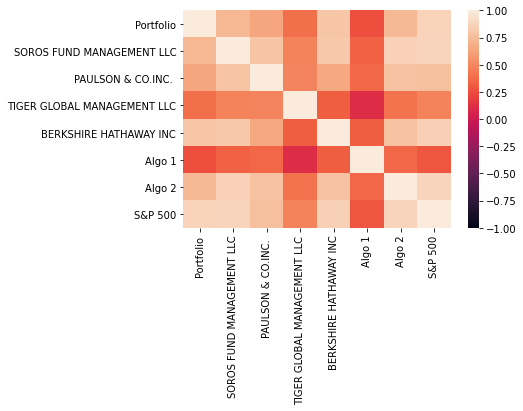

In [81]:
# Calculate and plot the correlation
correlation = summary_df.corr()
sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Portfolio Rolling 60-day Beta'}>

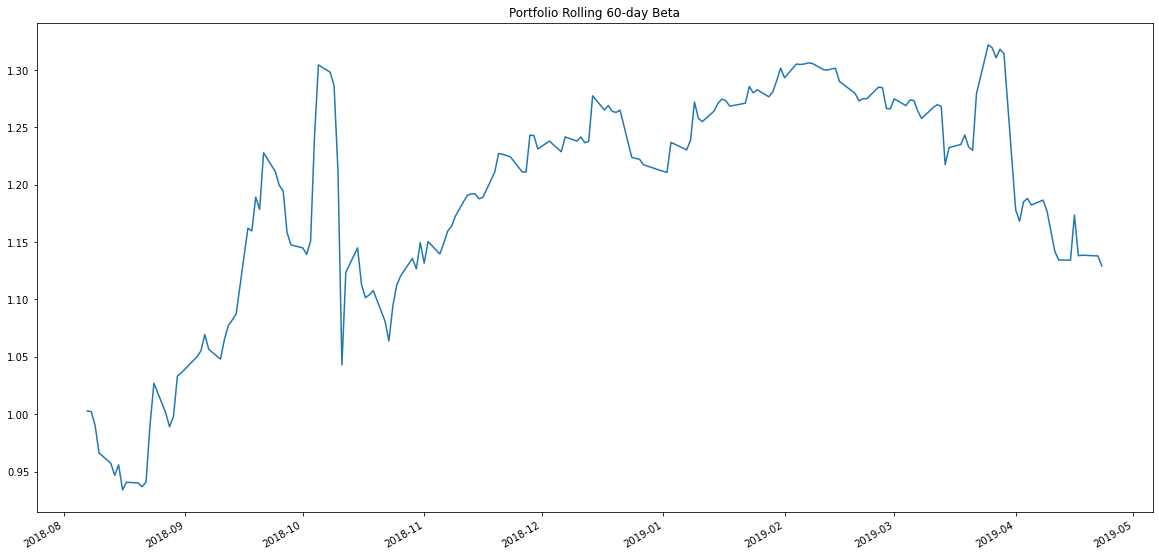

In [85]:
# Calculate and plot Beta
rolling_60d_var = summary_df['S&P 500'].rolling(window = 60).var()
rolling_60d_cov = summary_df['Portfolio'].rolling(window=60).cov(summary_df['S&P 500'])
rolling_60d_beta = rolling_60d_cov / rolling_60d_var
rolling_60d_beta.plot(figsize=(20, 10), title='Portfolio Rolling 60-day Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [86]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_annualized = (summary_df.mean() * 252) / ((summary_df).std() * np.sqrt(252))
sharpe_ratios_annualized

Portfolio                      0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

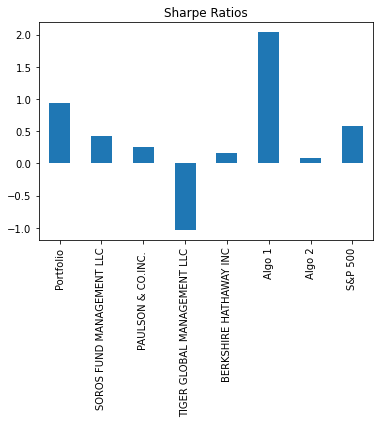

In [87]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_annualized.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

The portfolio performed well compared to the others, with Algo 1 being the only portfolio with a higher Sharpe ratio.